## 1. Basics of Recommendation Algorithm

In [6]:
from scipy.spatial.distance import cosine
import sklearn.metrics as metrics
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import correlation, cosine
import ipywidgets as widgets
from IPython.display import display, clear_output
from sklearn.metrics import pairwise_distances
from sklearn.metrics import mean_squared_error

In [7]:
#TODO: load dataset into variable M

(4, 4)
[3.  2.5 2.  2. ]


,0,1,2,3
0,4.0,3.0,2.0,3.0
1,1.0,2.0,3.0,1.0
2,NaN,2.0,1.0,NaN
3,4.0,3.0,NaN,NaN


### Compute similarities

#### Cosine

In [8]:
import math
def cosine_similarity(v1,v2, metric='cosine'):
    #metric: cosine or correlation
    if metric == 'correlation':
        v1 = v1 - np.nanmean(v1)
        v2 = v2 - np.nanmean(v2)
    "compute similarity of v1 to v2: (v1 dot v2)/{||v1||*||v2||)"
    sumxx, sumxy, sumyy = 0, 0, 0
    for i in range(len(v1)):
        x = v1[i]; y = v2[i]
        if np.isnan(x) or np.isnan(y): continue
        sumxx += x*x
        sumyy += y*y
        sumxy += x*y
    return sumxy/math.sqrt(sumxx*sumyy)

def sim_matrix(M, dimension='user', metric='cosine'):
    N = M.shape[0] if dimension == 'user' else M.shape[1]
    sim = np.zeros([N,N])
    for i in range(N):
        for j in range(N):
            if i == j:
                sim[i,j] = 0 #Cancel out the effect of self-similarity in the sums later
                continue
            if dimension == 'user':
                v1, v2 = M[i,:], M[j,:]
            else:
                v1, v2 = M[:,i], M[:,j]
            sim[i][j] = cosine_similarity(v1,v2,metric)
    return sim

In [9]:
cosine_similarity(M[0,:], M[2,:], 'cosine')

0.9922778767136677

In [10]:
sim_matrix(M, 'user')

array([[0.        , 0.79582243, 0.99227788, 1.        ],
       [0.79582243, 0.        , 0.86824314, 0.89442719],
       [0.99227788, 0.86824314, 0.        , 1.        ],
       [1.        , 0.89442719, 1.        , 0.        ]])

In [11]:
sim_matrix(M, 'item')

array([[0.        , 0.9649505 , 0.73994007, 0.99705449],
       [0.9649505 , 0.        , 0.90748521, 0.96476382],
       [0.73994007, 0.90748521, 0.        , 0.78935222],
       [0.99705449, 0.96476382, 0.78935222, 0.        ]])

#### Pearson

In [12]:
cosine_similarity(M[0,:], M[2,:], 'correlation')

0.7071067811865475

In [13]:
sim_matrix(M, 'user', 'correlation')

array([[ 0.        , -0.85280287,  0.70710678,  0.70710678],
       [-0.85280287,  0.        , -0.5547002 , -0.89442719],
       [ 0.70710678, -0.5547002 ,  0.        , -1.        ],
       [ 0.70710678, -0.89442719, -1.        ,  0.        ]])

In [14]:
sim_matrix(M, 'item', 'correlation')

array([[ 0.        ,  0.94280904, -0.89442719,  0.9486833 ],
       [ 0.94280904,  0.        ,  0.        ,  1.        ],
       [-0.89442719,  0.        ,  0.        , -0.70710678],
       [ 0.9486833 ,  1.        , -0.70710678,  0.        ]])

### a) Compute the missing rating in this table using user-based collaborative filtering (CF). (Use cosine similarity, then use Pearson similarity). Assume taking all neighbors

In [16]:
def user_cf(M, metric='cosine'):
    pred = np.copy(M)
    n_users, n_items = M.shape
    avg_ratings = np.nanmean(M, axis=1)
    sim_users = sim_matrix(M, 'user', metric)
    for i in range(n_users):
        for j in range(n_items):
            if np.isnan(M[i,j]):
                pred[i,j] = #TODO: finish the calculation here
    return pred

In [17]:
print("User-based CF (Cosine): \n" + str(pd.DataFrame(user_cf(M, 'cosine'))))
print("User-based CF (Pearson): \n" + str(pd.DataFrame(user_cf(M, 'correlation'))))

User-based CF (Cosine): 
          0    1         2         3
0  4.000000  3.0  2.000000  3.000000
1  1.000000  2.0  3.000000  1.000000
2  1.794036  2.0  1.000000  1.272355
3  4.000000  3.0  3.368034  3.268237
User-based CF (Pearson): 
          0    1         2         3
0  4.000000  3.0  2.000000  3.000000
1  1.000000  2.0  3.000000  1.000000
2  0.764822  2.0  1.000000  1.009169
3  4.000000  3.0  4.616077  2.935013


### b) Similarly, computing the missing rating using item-based CF.

In [18]:
def item_cf(M, metric='cosine'):
    pred = np.copy(M)
    n_users, n_items = M.shape
    avg_ratings = np.nanmean(M, axis=0)
    sim_items = sim_matrix(M, 'item', metric)
    for i in range(n_users):
        for j in range(n_items):
            if np.isnan(M[i,j]):
                pred[i,j] = #TODO: finish the calculation here
    return pred

In [19]:
print("Item-based CF (Cosine): \n" + str(pd.DataFrame(item_cf(M, 'cosine'))))
print("Item-based CF (Pearson): \n" + str(pd.DataFrame(item_cf(M, 'correlation'))))

Item-based CF (Cosine): 
         0    1         2         3
0  4.00000  3.0  2.000000  3.000000
1  1.00000  2.0  3.000000  1.000000
2  2.54758  2.0  1.000000  1.537748
3  4.00000  3.0  2.489861  2.537748
Item-based CF (Pearson): 
          0    1         2        3
0  4.000000  3.0  2.000000  3.00000
1  1.000000  2.0  3.000000  1.00000
2  3.424268  2.0  1.000000  2.16681
3  4.000000  3.0  2.558482  3.16681


## 2. Evaluating Recommendation Algorithms

### Predictive Accuracy

In [21]:
M_result = np.asarray([[4,3,2,3], 
                [1,2,3,1],
                [1,2,1,2],
                [4,3,2,4]])
pd.DataFrame(M_result)

,0,1,2,3
0,4,3,2,3
1,1,2,3,1
2,1,2,1,2
3,4,3,2,4


In [22]:
def evaluateRS(ratings, groundtruth, method='user_cf', metric='cosine'):
    #method: user_cf and item_cf, metric: cosine and correlation
    if method == 'user_cf':
        prediction = user_cf(ratings, metric)
    else:
        prediction = item_cf(ratings, metric)
    MSE = mean_squared_error(prediction, groundtruth)
    RMSE = round(sqrt(MSE),3)
    print("RMSE using {0} approach ({2}) is: {1}".format(method, RMSE, metric))
    print(pd.DataFrame(prediction))
    return

In [23]:
#TODO: evaluate the predictive accuracy 

RMSE using user_cf approach (cosine) is: 0.472
          0    1         2         3
0  4.000000  3.0  2.000000  3.000000
1  1.000000  2.0  3.000000  1.000000
2  1.794036  2.0  1.000000  1.272355
3  4.000000  3.0  3.368034  3.268237
RMSE using user_cf approach (correlation) is: 0.751
          0    1         2         3
0  4.000000  3.0  2.000000  3.000000
1  1.000000  2.0  3.000000  1.000000
2  0.764822  2.0  1.000000  1.009169
3  4.000000  3.0  4.616077  2.935013
RMSE using item_cf approach (cosine) is: 0.558
         0    1         2         3
0  4.00000  3.0  2.000000  3.000000
1  1.00000  2.0  3.000000  1.000000
2  2.54758  2.0  1.000000  1.537748
3  4.00000  3.0  2.489861  2.537748
RMSE using item_cf approach (correlation) is: 0.657
          0    1         2        3
0  4.000000  3.0  2.000000  3.00000
1  1.000000  2.0  3.000000  1.00000
2  3.424268  2.0  1.000000  2.16681
3  4.000000  3.0  2.558482  3.16681


### Ranking Accuracy

In [1]:
import scipy.stats as stats

def evaluate_rank(ratings, groundtruth, method='user_cf', metric='cosine'):
    #metric: cosine vs correlation
    if method == 'user_cf':
        prediction = user_cf(ratings, metric)
    else:
        prediction = item_cf(ratings, metric)
    
    avg_tau = 0
    for i in range(n_users):
        tau, p_value = stats.kendalltau(M_result[i,:], prediction[i,:])
        avg_tau += tau
    avg_tau = avg_tau / n_users
    clear_output(wait=True)
    return avg_tau


#TODO: calculate the ranking accuracy




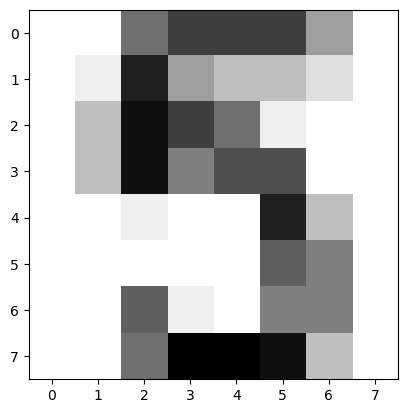

In [2]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

digits = datasets.load_digits()

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
        random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.9833333333333333


C:\Users\19521\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


C:\Users\19521\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\19521\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

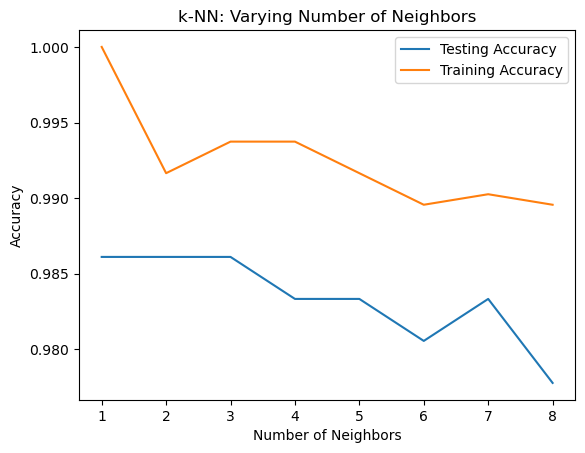

In [4]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)
    
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [5]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

In [6]:
from torchvision import datasets, transforms
mnist = datasets.MNIST(root='', train=True, download=True)

print("Number of training example: ", mnist.train_data.shape)
print("Image information ", mnist[0])

Number of training example:  torch.Size([60000, 28, 28])
Image information  (<PIL.Image.Image image mode=L size=28x28 at 0x1630BB95310>, 5)


C:\Users\19521\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


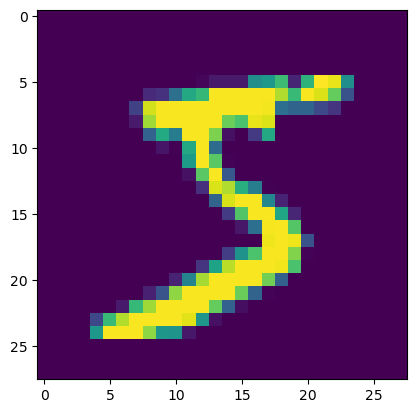

In [7]:
import matplotlib.pyplot  as plt 
%matplotlib inline
plt.imshow(mnist[0][0])

In [8]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.fully = nn.Sequential(
            nn.Linear(28*28, 10)
        )
        
    def forward(self, x):
        x = x.view([-1,28*28])
        x = self.fully(x)
        x = F.log_softmax(x, dim=1)
        return x

In [13]:
train_loader = torch.utils.data.DataLoader(datasets.MNIST(root=".", train=True, transform=transforms.Compose([transforms.ToTensor()])), batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(datasets.MNIST(root=".", train=False, transform=transforms.Compose([transforms.ToTensor()])), batch_size=1, shuffle=True)

In [14]:
def train():
    learning_rate = 1e-3
    num_epochs = 3
    
    net = Net()
    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
    
    for epoch in range(num_epochs):
        for batch_idx, (data, target) in enumerate(train_loader):
            output = net(data)

            loss = F.nll_loss(output, target)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            if batch_idx % 100 == 0:
                print('Epoch = %f. Batch = %s. Loss = %s' % (epoch, batch_idx, loss.item()))  
                
    return net

In [15]:
net = train()

Epoch = 0.000000. Batch = 0. Loss = 2.289964437484741
Epoch = 0.000000. Batch = 100. Loss = 0.7587730884552002
Epoch = 0.000000. Batch = 200. Loss = 0.5352658629417419
Epoch = 0.000000. Batch = 300. Loss = 0.35426050424575806
Epoch = 0.000000. Batch = 400. Loss = 0.5062364339828491
Epoch = 0.000000. Batch = 500. Loss = 0.42934438586235046
Epoch = 0.000000. Batch = 600. Loss = 0.4469713568687439
Epoch = 0.000000. Batch = 700. Loss = 0.4373258650302887
Epoch = 0.000000. Batch = 800. Loss = 0.4607478678226471
Epoch = 0.000000. Batch = 900. Loss = 0.2879359722137451
Epoch = 1.000000. Batch = 0. Loss = 0.28497573733329773
Epoch = 1.000000. Batch = 100. Loss = 0.3312591016292572
Epoch = 1.000000. Batch = 200. Loss = 0.3861157298088074
Epoch = 1.000000. Batch = 300. Loss = 0.39442750811576843
Epoch = 1.000000. Batch = 400. Loss = 0.22921356558799744
Epoch = 1.000000. Batch = 500. Loss = 0.3783930838108063
Epoch = 1.000000. Batch = 600. Loss = 0.24771632254123688
Epoch = 1.000000. Batch = 700.

In [16]:
net.eval()
test_loss = 0
correct = 0
total = 0

for data, target in test_loader:
    total += len(target)
    output = net(data)
    pred = output.max(1, keepdim=True)[1]
    correct += target.eq(pred.view_as(target)).sum()
    
print("Correct out of %s" % total, correct.item())
print("Percentage accuracy", correct.item()*100/10000.)

Correct out of 10000 9200
Percentage accuracy 92.0


In [17]:
#II. Linear Regression

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('gapminder.csv')

<AxesSubplot:>

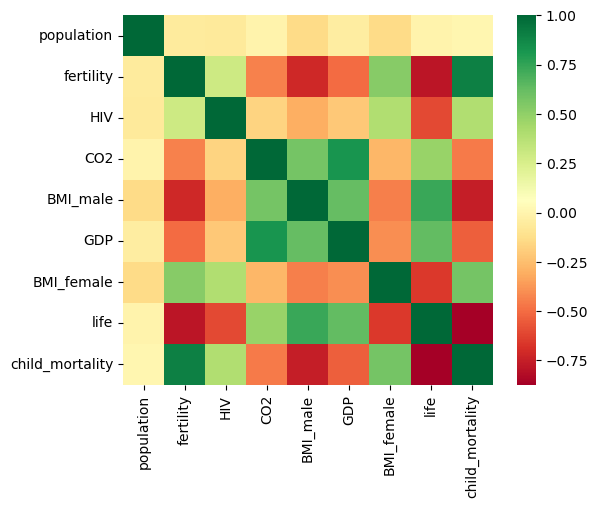

In [19]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

0.6162438752151919


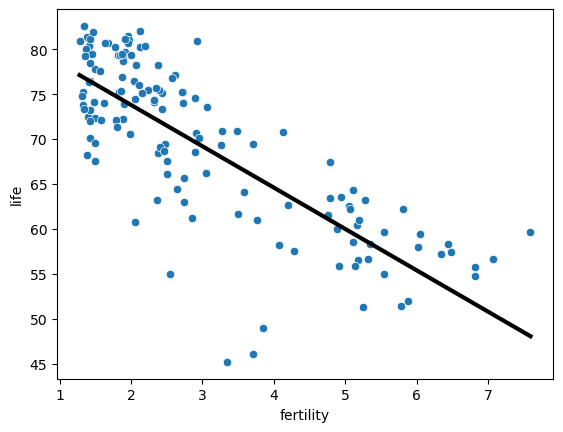

In [20]:
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

X_fertility = df['fertility'].values.reshape(-1, 1)
y = df['life'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X_fertility, y, test_size=0.3, random_state=42)

# Create th prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1, 1)

# Fit the model to the data
reg.fit(X_train, y_train)

# compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print $R^2$
print(reg.score(X_fertility, y))

# Plot regression line on scatter plot
sns.scatterplot(x='fertility', y='life', data=df)
plt.plot(prediction_space, y_pred, color='black', linewidth=3)

In [21]:
features = pd.read_csv('gapminder.csv')
df = pd.read_csv('gapminder.csv')
del features['life']
del features['Region']

y_life = df['life'].values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(features, y_life, test_size=0.3, random_state=42)

reg_all = LinearRegression()
reg_all.fit(x_train, y_train)
print(reg_all.score(features, y_life))

0.8914651485793137


In [22]:
## Linear Regression using PyTorch

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

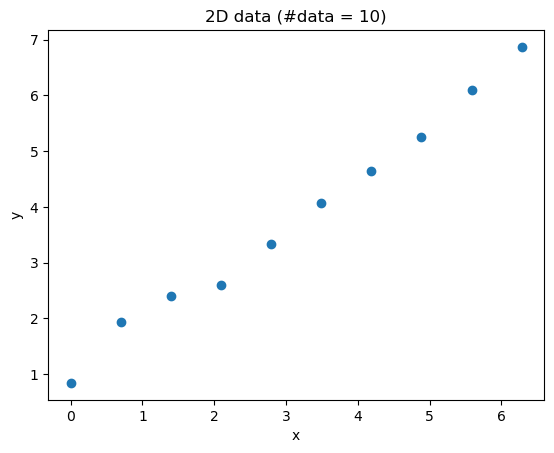

In [24]:
N = 10 # number of data points
m = .9
c = 1
x = np.linspace(0,2*np.pi,N)
y = m*x + c + np.random.normal(0,.3,x.shape)
plt.figure()
plt.plot(x,y,'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D data (#data = %d)' % N)
plt.show()

In [25]:
import torch

In [26]:
# Dataset

In [27]:
from torch.utils.data import Dataset
class MyDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        sample = {
            'feature': torch.tensor([1,self.x[idx]]), 
            'label': torch.tensor([self.y[idx]])}
        return sample

In [28]:
dataset = MyDataset(x, y)
for i in range(len(dataset)):
    sample = dataset[i]
    print(i, sample['feature'], sample['label'])

0 tensor([1., 0.], dtype=torch.float64) tensor([0.8406], dtype=torch.float64)
1 tensor([1.0000, 0.6981], dtype=torch.float64) tensor([1.9303], dtype=torch.float64)
2 tensor([1.0000, 1.3963], dtype=torch.float64) tensor([2.4044], dtype=torch.float64)
3 tensor([1.0000, 2.0944], dtype=torch.float64) tensor([2.5916], dtype=torch.float64)
4 tensor([1.0000, 2.7925], dtype=torch.float64) tensor([3.3392], dtype=torch.float64)
5 tensor([1.0000, 3.4907], dtype=torch.float64) tensor([4.0664], dtype=torch.float64)
6 tensor([1.0000, 4.1888], dtype=torch.float64) tensor([4.6415], dtype=torch.float64)
7 tensor([1.0000, 4.8869], dtype=torch.float64) tensor([5.2515], dtype=torch.float64)
8 tensor([1.0000, 5.5851], dtype=torch.float64) tensor([6.0927], dtype=torch.float64)
9 tensor([1.0000, 6.2832], dtype=torch.float64) tensor([6.8690], dtype=torch.float64)


In [29]:
#Dataloader


In [30]:
from torch.utils.data import DataLoader

dataset = MyDataset(x, y)
batch_size = 4
shuffle = True
num_workers = 4
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)

In [31]:
import pprint as pp
for i_batch, samples in enumerate(dataloader):
    print('\nbatch# = %s' % i_batch)
    print('samples: ')
    pp.pprint(samples)

RuntimeError: DataLoader worker (pid(s) 16940, 788, 11688, 4148) exited unexpectedly

In [32]:
#model


In [33]:
import torch.nn as nn
import torch.nn.functional as F
class MyModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MyModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return out

In [34]:
### Setting a model for our problem

In [35]:
    input_dim = 2
    output_dim = 1

    model = MyModel(input_dim, output_dim)

In [37]:
## Cost function

#Often called loss or error

In [38]:
cost = nn.MSELoss()

In [39]:
## Minimizing the cost function

#In other words training (or learning from data)

In [40]:
num_epochs = 10
l_rate = 0.01
optimiser = torch.optim.SGD(model.parameters(), lr = l_rate) 

dataset = MyDataset(x, y)
batch_size = 4
shuffle = True
num_workers = 4
training_sample_generator = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)

for epoch in range(num_epochs):
    print('Epoch = %s' % epoch)
    for batch_i, samples in enumerate(training_sample_generator):
        predictions = model(samples['feature'])
        error = cost(predictions, samples['label'])
        print('\tBatch = %s, Error = %s' % (batch_i, error.item()))
        optimiser.zero_grad()
        error.backward()
        optimiser.step()

Epoch = 0


RuntimeError: DataLoader worker (pid(s) 3520, 16144, 16832, 10904) exited unexpectedly

In [41]:
## Lets see how well the model has learnt the data

In [42]:
x_for_plotting = np.linspace(0, 2*np.pi, 1000)
design_matrix = torch.tensor(np.vstack([np.ones(x_for_plotting.shape), x_for_plotting]).T, dtype=torch.float32)
print('Design matrix shape:', design_matrix.shape)

y_for_plotting = model.forward(design_matrix)
print('y_for_plotting shape:', y_for_plotting.shape)

Design matrix shape: torch.Size([1000, 2])
y_for_plotting shape: torch.Size([1000, 1])


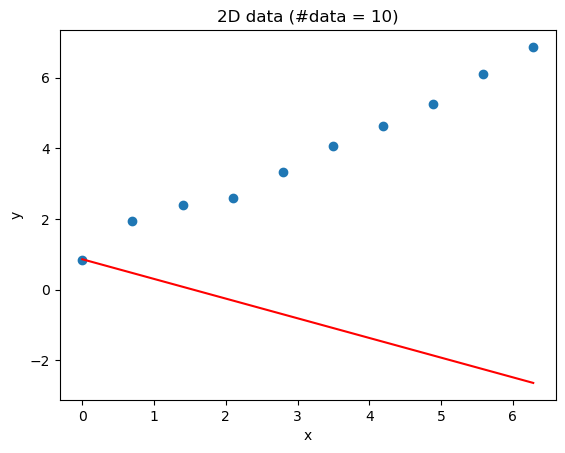

In [43]:
plt.figure()
plt.plot(x,y,'o')
plt.plot(x_for_plotting, y_for_plotting.data.numpy(), 'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D data (#data = %d)' % N)
plt.show()

In [44]:
#IV Exercise


In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split , KFold
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [46]:
# import iris dataset
iris = datasets.load_iris()
# np.c_ is the numpy concatenate function
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                      columns= iris['feature_names'] + ['target'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [47]:
x= iris_df.iloc[:, :-1]
y= iris_df.iloc[:, -1]

In [48]:
# split the data into train and test sets
x_train, x_test, y_train, y_test= train_test_split(x, y,
                                                   test_size= 0.2,
                                                   shuffle= True, #shuffle the data to avoid bias
                                                   random_state= 0)
x_train= np.asarray(x_train)
y_train= np.asarray(y_train)

x_test= np.asarray(x_test)
y_test= np.asarray(y_test)

In [49]:
print(f'training set size: {x_train.shape[0]} samples \ntest set size: {x_test.shape[0]} samples')

training set size: 120 samples 
test set size: 30 samples


In [50]:
scaler= Normalizer().fit(x_train) # the scaler is fitted to the training set
normalized_x_train= scaler.transform(x_train) # the scaler is applied to the training set
normalized_x_test= scaler.transform(x_test) # the scaler is applied to the test set

In [51]:
print('x train before Normalization')
print(x_train[0:5])
print('\nx train after Normalization')
print(normalized_x_train[0:5])

x train before Normalization
[[6.4 3.1 5.5 1.8]
 [5.4 3.  4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [6.1 3.  4.9 1.8]
 [6.4 2.8 5.6 2.2]]

x train after Normalization
[[0.69804799 0.338117   0.59988499 0.196326  ]
 [0.69333409 0.38518561 0.57777841 0.1925928 ]
 [0.80641965 0.54278246 0.23262105 0.03101614]
 [0.71171214 0.35002236 0.57170319 0.21001342]
 [0.69417747 0.30370264 0.60740528 0.2386235 ]]


Text(0.5, 1.08, 'Pair Plot of the dataset After normalization')

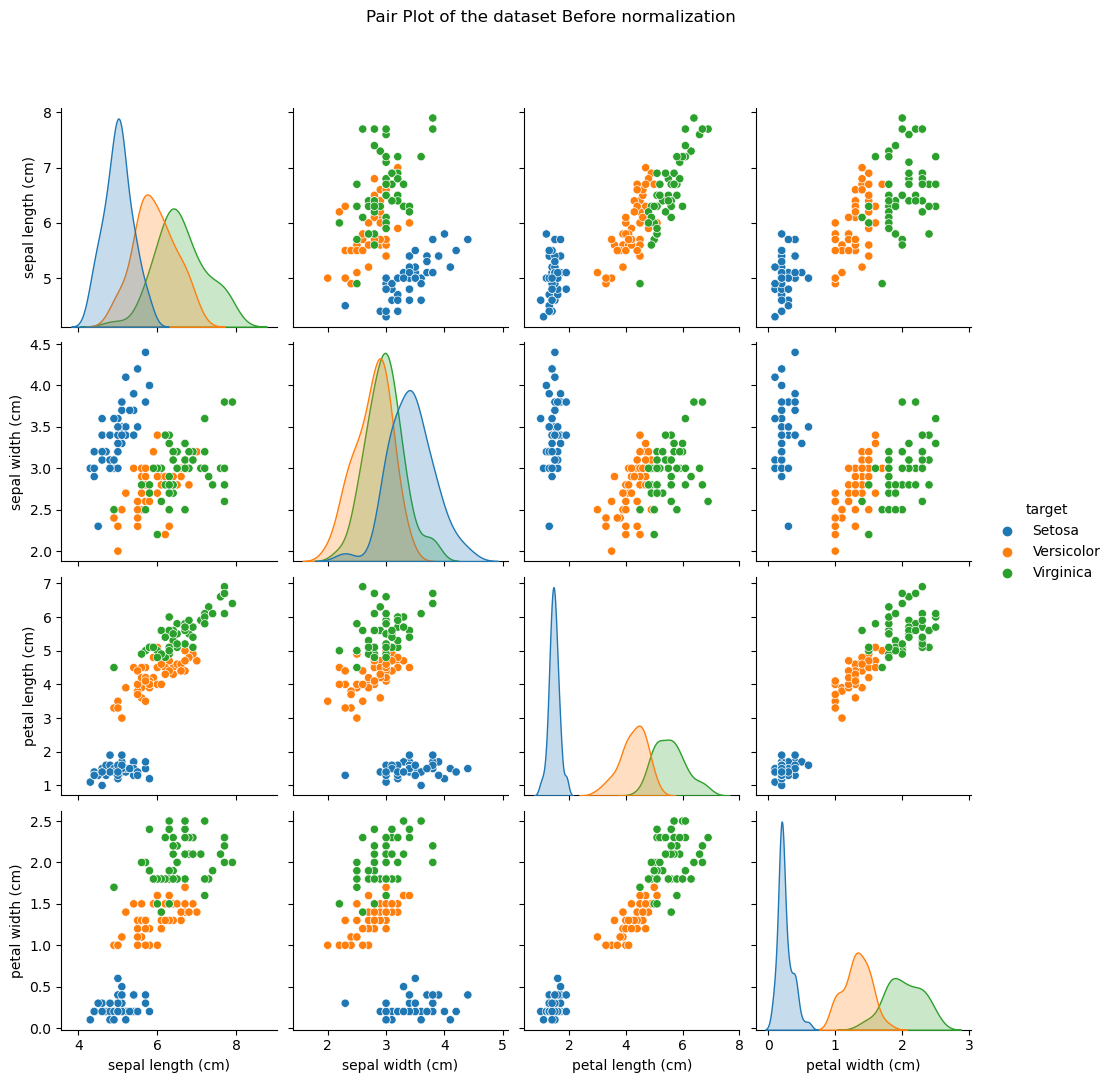

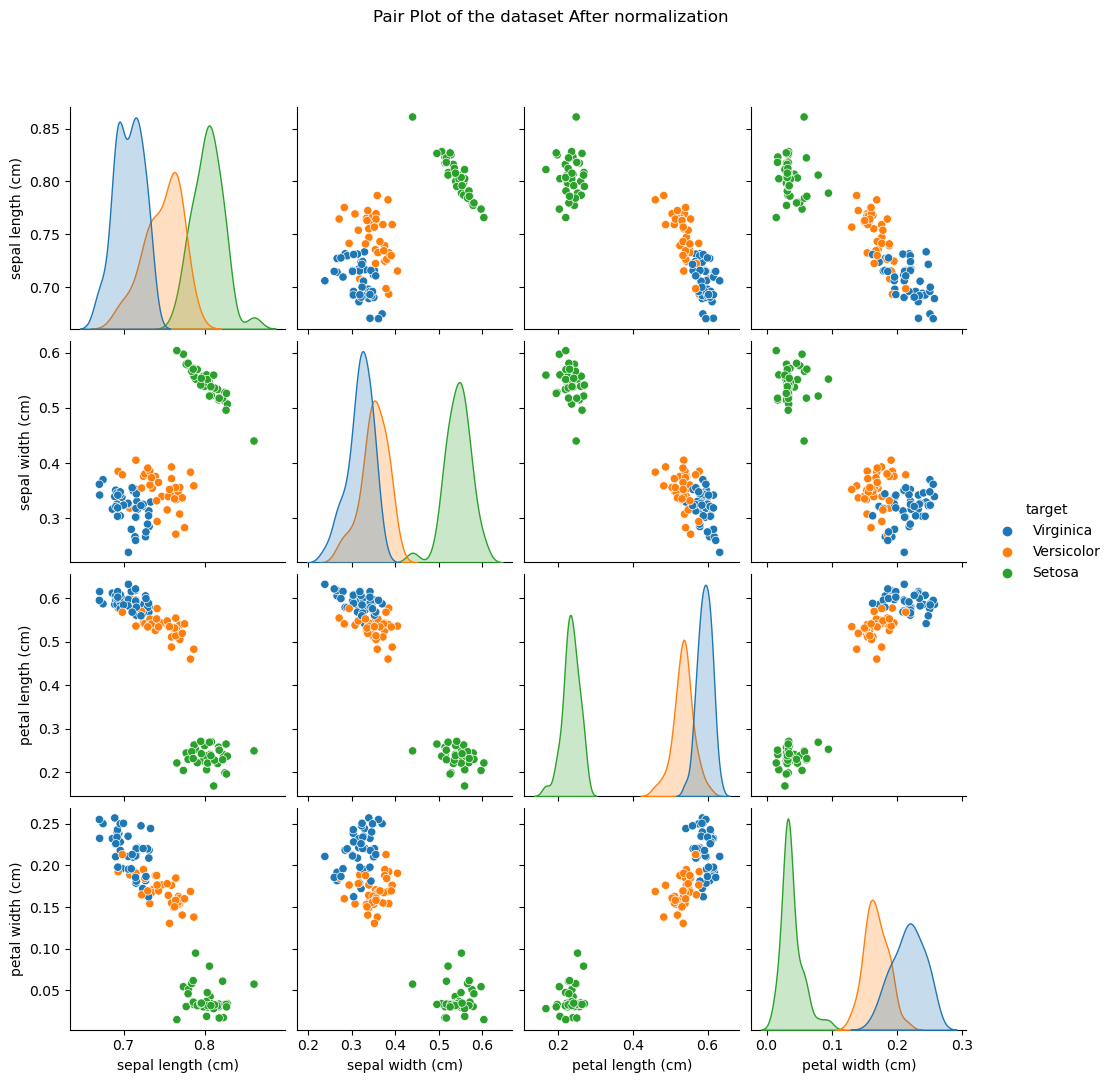

In [52]:
## Before
# View the relationships between variables; color code by species type
di= {0.0: 'Setosa', 1.0: 'Versicolor', 2.0:'Virginica'} # dictionary

before= sns.pairplot(iris_df.replace({'target': di}), hue= 'target')
before.fig.suptitle('Pair Plot of the dataset Before normalization', y=1.08)

## After
iris_df_2= pd.DataFrame(data= np.c_[normalized_x_train, y_train],
                        columns= iris['feature_names'] + ['target'])
di= {0.0: 'Setosa', 1.0: 'Versicolor', 2.0: 'Virginica'}
after= sns.pairplot(iris_df_2.replace({'target':di}), hue= 'target')
after.fig.suptitle('Pair Plot of the dataset After normalization', y=1.08)

In [53]:
def distance_ecu(x_train, x_test_point):
  """
  Input:
    - x_train: corresponding to the training data
    - x_test_point: corresponding to the test point

  Output:
    -distances: The distances between the test point and each point in the training data.

  """
  distances= []  ## create empty list called distances
  for row in range(len(x_train)): ## Loop over the rows of x_train
      current_train_point= x_train[row] #Get them point by point
      current_distance= 0 ## initialize the distance by zero

      for col in range(len(current_train_point)): ## Loop over the columns of the row
          
          current_distance += (current_train_point[col] - x_test_point[col]) **2
          ## Or current_distance = current_distance + (x_train[i] - x_test_point[i])**2
      current_distance= np.sqrt(current_distance)

      distances.append(current_distance) ## Append the distances

  # Store distances in a dataframe
  distances= pd.DataFrame(data=distances,columns=['dist'])
  return distances

In [54]:
def nearest_neighbors(distance_point, K):
    """
    Input:
        -distance_point: the distances between the test point and each point in the training data.
        -K             : the number of neighbors

    Output:
        -df_nearest: the nearest K neighbors between the test point and the training data.

    """

    # Sort values using the sort_values function
    df_nearest= distance_point.sort_values(by=['dist'], axis=0)

    ## Take only the first K neighbors
    df_nearest= df_nearest[:K]
    return df_nearest

In [61]:
# 2. Recommendation Systems


In [62]:
import pandas as pd
import numpy as np

# Read the movies.csv file
movies_df = pd.read_csv('movies.csv', encoding="ISO-8859-1")
# Read the users.csv file
users_df = pd.read_csv('users.csv', encoding="ISO-8859-1")
# Read the ratings.csv file
ratings_df = pd.read_csv('ratings.csv', encoding="ISO-8859-1")

In [63]:
# Find list of used genres which is used to category the movies.
movies_df['genres'] = movies_df['genres'].fillna('')

unique_genres = []
for genres in movies_df['genres'].str.split('|'):
    for genre in genres:
        if genre not in unique_genres:
            if genre != "":
                unique_genres.append(genre)
print(unique_genres)

['Animation', "Children's", 'Comedy', 'Adventure', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Sci-Fi', 'Documentary', 'War', 'Musical']


In [64]:
Ij = np.zeros((movies_df.shape[0], len(unique_genres)), dtype=int)
for i, genres in enumerate(movies_df['genres'].str.split('|')):
    for genre in genres:
        if (not isinstance(genre, str)) or (genre == '') or (genre not in unique_genres):
            continue
        j = unique_genres.index(genre)
        Ij[i, j] = 1

np.set_printoptions(formatter={'all': lambda x: f"{x}, "})
print(Ij[:4])

[[1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, ]
 [0,  1,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, ]
 [0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0, ]
 [0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0, ]]


In [66]:
merged_df = pd.merge(ratings_df, movies_df, on='movie_id', how='left')

unique_genres = set('|'.join(merged_df['genres'].tolist()).split('|'))

genre_index_dict = {genre: i for i, genre in enumerate(unique_genres)}

num_users = ratings_df['user_id'].nunique()
Uj = np.zeros((num_users, len(unique_genres)), dtype=int)
for index, row in ratings_df.iterrows():
    user_id = row['user_id']
    movie_id = row['movie_id']
    rating = row['rating']

    genres = merged_df.loc[merged_df['movie_id'] == movie_id]['genres'].tolist()[0].split('|')
    
    for genre in genres:
        j = genre_index_dict[genre]
        Uj[user_id-1, j] = 1
Uj = Uj[:, :-1]
print(Uj[:4])

[[1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, ]
 [1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1, ]
 [1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, ]
 [1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, ]]


In [67]:
from sklearn.metrics.pairwise import cosine_similarity

cos_sim = cosine_similarity(Uj, Ij)


print(cos_sim)

[[0.4629100498862758,  0.3086066999241839,  0.3779644730092272,  ...
  0.3779644730092272,  0.2672612419124244,  0.3779644730092272, ]
 [0.4629100498862758,  0.4629100498862758,  0.3779644730092272,  ...
  0.3779644730092272,  0.2672612419124244,  0.1889822365046136, ]
 [0.4472135954999579,  0.4472135954999579,  0.36514837167011066,  ...
  0.36514837167011066,  0.2581988897471611,  0.36514837167011066, ]
 ...
 [0.4629100498862758,  0.4629100498862758,  0.3779644730092272,  ...
  0.3779644730092272,  0.2672612419124244,  0.1889822365046136, ]
 [0.447213595499958,  0.447213595499958,  0.36514837167011066,  ...
  0.36514837167011066,  0.2581988897471611,  0.36514837167011066, ]
 [0.447213595499958,  0.447213595499958,  0.36514837167011066,  ...
  0.36514837167011066,  0.2581988897471611,  0.36514837167011066, ]]


In [68]:
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics import mean_squared_error
from math import sqrt
import pandas as pd
import numpy as np

# Load the data
ratings = pd.read_csv('ratings.csv')

# Split the data into training and testing sets
train_data, test_data = train_test_split(ratings, test_size=0.5)

# Create user-item matrices for training and testing data
train_data_matrix = train_data.pivot_table(index='user_id', columns='movie_id', values='rating').fillna(0)
test_data_matrix = test_data.pivot_table(index='user_id', columns='movie_id', values='rating').fillna(0)

# Calculate user similarity
user_correlation = 1 - pairwise_distances(train_data_matrix, metric='cosine')

# Replace NaN values with 0 and set diagonal values to 0
np.fill_diagonal(user_correlation, 0)
user_correlation[np.isnan(user_correlation)] = 0

print(user_correlation)

[[0.0,  0.33098174606358477,  0.4172217197445215,  ...
  0.3077224854230074,  0.42308162077682665,  0.30496836974878727, ]
 [0.33098174606358477,  0.0,  0.4685505888713132,  ...
  0.3483677210746168,  0.33318028470609184,  0.33289803860782796, ]
 [0.4172217197445215,  0.4685505888713132,  0.0,  ...
  0.21235365095800507,  0.3560113382062884,  0.37776631381407955, ]
 ...
 [0.3077224854230074,  0.3483677210746168,  0.21235365095800507,  ...
  0.0,  0.439139729186362,  0.2620488743767848, ]
 [0.42308162077682665,  0.33318028470609173,  0.3560113382062884,  ...
  0.439139729186362,  0.0,  0.301668346223273, ]
 [0.30496836974878727,  0.33289803860782796,  0.37776631381407955,  ...
  0.2620488743767849,  0.301668346223273,  0.0, ]]


In [70]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(ratings_df, test_size=0.5)
train_data_matrix = train_data.pivot_table(index='user_id', columns='movie_id', values='rating').astype('float64').fillna(0)
test_data_matrix = test_data.pivot_table(index='user_id', columns='movie_id', values='rating').astype('float64').fillna(0)

from scipy.spatial.distance import correlation

def calculate_user_correlation(train_data_matrix):
   
    user_correlation = 1 - pairwise_distances(train_data_matrix.values, metric='correlation')
    np.fill_diagonal(user_correlation, 0) # Set the diagonal values to 0 to avoid recommending the same item
    return user_correlation

user_correlation = calculate_user_correlation(train_data_matrix)

print(user_correlation)

[[0.0,  0.04253711020663431,  -0.05867411787134236,  ...
  -0.13259466575409284,  0.0018720060874741762,  0.08507708819439608, ]
 [0.04253711020663431,  0.0,  0.06059485276312049,  ...
  0.14008135088173446,  0.037531604021173726,  -0.10029505402590555, ]
 [-0.05867411787134236,  0.06059485276312049,  0.0,  ...
  0.047714793409737055,  -0.003629682086134345,  -0.20980293250180626, ]
 ...
 [-0.13259466575409284,  0.14008135088173446,  0.047714793409737055,  ...
  0.0,  -0.12761547974565346,  -0.02598810555132247, ]
 [0.0018720060874741762,  0.037531604021173726,  -0.003629682086134345,
  ... -0.12761547974565346,  0.0,  -0.009088395849460085, ]
 [0.08507708819439608,  -0.10029505402590555,  -0.20980293250180626,  ...
  -0.02598810555132247,  -0.009088395849460085,  0.0, ]]


In [71]:
def predict_user_based(user_correlation, train_data_matrix, user_id, item_id, k=10):
    # Calculate the mean rating for each user in the training dataset
    mean_user_rating = train_data_matrix.mean(axis=1)

    # Calculate the similarity between the active user and all other users
    sim_scores = user_correlation[user_id-1]

    # Select the top k most similar users
    top_similar_users = sim_scores.argsort()[::-1][1:k+1]

    # Calculate the weighted average of the ratings given by the k neighbors to the item
    item_ratings = train_data_matrix.loc[:, item_id]
    item_ratings = item_ratings[top_similar_users]
    sim_scores = sim_scores[top_similar_users]
    predicted_rating = np.dot(item_ratings, sim_scores) / sim_scores.sum()

    # Normalize the predicted rating by adding the mean rating of the active user
    predicted_rating += mean_user_rating[user_id]
    return predicted_rating
